# Real Estate - Price Predictor

In [1]:
import pandas as pd

In [3]:
housing = pd.read_csv("houseData.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe() 
# count : This ignores the null values and show the others with some values
# mean : average 
# std : standard deviation
# here 25%, 50% and 75% means that the values that is shows are less than 25%, 50% and 75%

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245609B1D48>,
      dtype=object)

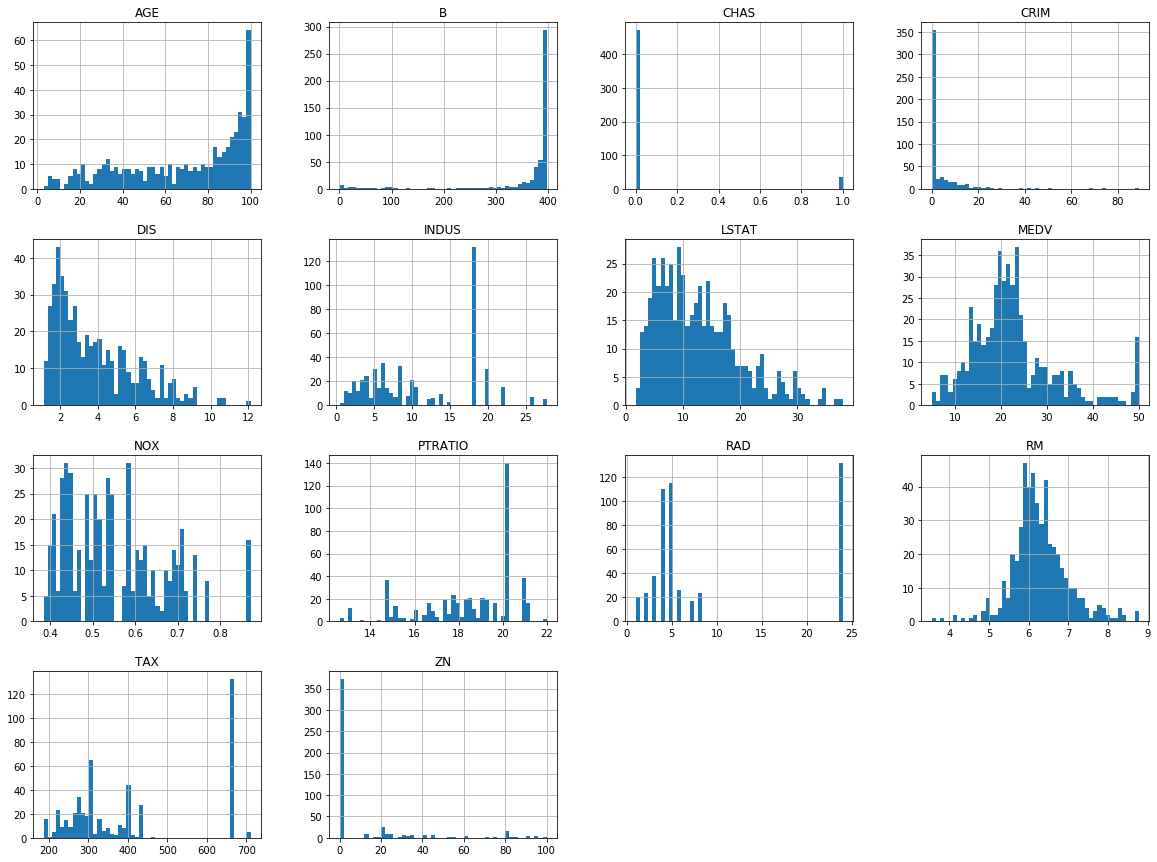

In [9]:
# # For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [11]:
#all done but here is something else that as we saw in our CHAS feature we had 0 - 471 and 1 - 35 so if we split our train and test
# this way there is a possibility that all the zeros go to our test and this could land in bad or wrong predictions So here we use a
# concept of Statified Sampling

In [12]:
#So here we are now using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()
#So now here as we can see now it's taking both 0 and 1 values

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
test_check = 95/7
train_check = 376/28
print("test ratio: " + str(test_check) + " and " + "test ratio: " + str(train_check))
#Here we can see almost same ratio we have of test and train
# same classification ratio is very import  while doing regression

test ratio: 13.571428571428571 and test ratio: 13.428571428571429


In [16]:
# before looking for corrletions it's good to take a copy of your dataset
housing = strat_train_set.copy()

## Looking for Correlations

In [17]:
#pearson correlation coefficient
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
# 1 means strong positive correlation and as we can see MEDV(actual price) is 1
# 0.69 we can also see in RM(number of rooms per dwelling)(maximum the number of rooms maximum the price) 
#so we can see how well our corrleation is matching with our data
#pearson corrleation lies between -1 to 1
#LSTAT(% of lower status population) is -0.73 which shows that less the number of lower status people the more will be the pricing in the area which makes sense.

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024564AA8BC8>,
      dtype=object)

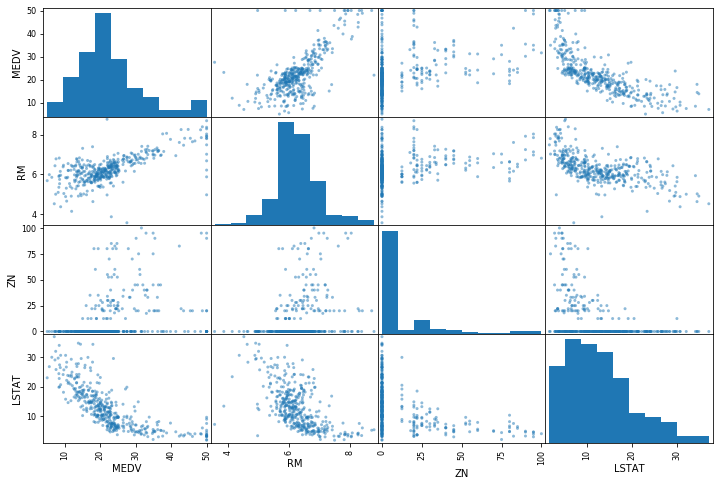

In [22]:
# from pandas.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

#here we are using only these four because we can't plot everyone because 14*14 makes a total of 196 combinations

In [23]:
#In the above scatter we can clearly see that how LSTAT is decreasing and MEDV is increasing at LSTAT decreases

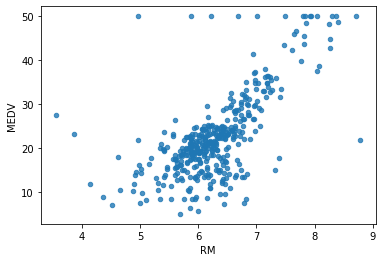

In [24]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

#here alpha is for density

In [25]:
#Now here comes a thought if we somehow able to remove these outlets that are scatterd in the graph away from the increasing pattern
# we can give us a clean dataset and our machine learning will not be confused because of these points and will learn good pattern
#And the prediciton will be also good
#we have a capping at 50 
# we can see the points at 50 betweeen MEDV and RM those points are not good because if the rooms then the price must also increase
#which is not happening there

## Trying out Attribute combinations


In [26]:
# here we are creating a new features i.e TAX per room (TAXRM)
housing["TAXRM"] = housing['TAX']/housing['RM']

In [27]:
#we can enhance our dataset using attribute combinations

In [28]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [29]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

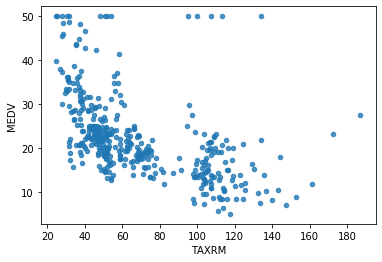

In [30]:
# here we can see we have got a very good feature TAXRM is second after LSTAT
housing.plot(kind="scatter", x="TAXRM", y = "MEDV", alpha=0.8)
# we can see we have got a very strong negative relation between our TAXRM and MEDV

In [31]:
# NOTE: In our Dataset we don't have any missing values so there is no need to worry aoutr missing attributes but we had some 
  #  missing attributes then we can use "Imputer"  imputer is very helpful in these case 

In [32]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [33]:
#Now we are creating a pipleine which will help automate our program a bit 
#means we are writing the code so that we can make changes easily later on our code, change strategies etc.

## Creating a Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [36]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
some_data = housing.iloc[:5]

In [39]:
some_labels = housing_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([22.375, 25.46 , 16.507, 23.335, 23.533])

In [42]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [44]:
rmse

1.2516810241186098

## Using better evaluation technique - Cross Validation

In [45]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores

array([2.72123917, 2.83015756, 4.40261077, 2.53007684, 3.4839158 ,
       2.78191638, 4.73911419, 3.38196039, 3.25842499, 2.93759891])

In [47]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [48]:
print_scores(rmse_scores)

Scores: [2.72123917 2.83015756 4.40261077 2.53007684 3.4839158  2.78191638
 4.73911419 3.38196039 3.25842499 2.93759891]
Mean:  3.3067014996392827
Standard deviation:  0.6983455414557487


## Saving the model

In [49]:
from joblib import dump, load
dump(model, 'realEstate.joblib') 

['realEstate.joblib']

## Testing the model on test data

In [55]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[25.124 10.984 25.687 22.147 18.27  14.906 20.189 15.05  31.029 41.392
 19.363 11.688 25.723 27.002 19.477 11.36  31.497 14.514 23.731 18.028
 19.659 17.603 17.536 22.108 18.502 31.184 16.259 33.418  8.909 33.919
 24.7   21.387 22.981 10.865 21.305 10.794 42.9   24.232 23.383 41.524
 24.157 29.487 20.253 20.694 18.753 32.628 44.745 20.252 20.24  21.746
 21.417 14.573 21.219 15.447 25.782 32.984 42.397 28.998 19.896 20.746
 46.737  9.313 19.094 25.156 15.375 33.526 20.376 18.197 19.074 34.353
 26.412 22.779 21.674 22.469 34.859 12.737 15.642 20.033 20.878 21.283
 22.333 20.963 13.614 22.717 20.922 21.573 14.11  21.482 21.745 23.394
 18.752 26.782  7.274 26.842 19.612 29.273 19.728 30.928 14.405 26.548
 21.096 20.451] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [56]:
final_rmse
# here we are getting our root mean squraerd error approx 3 which is very very good as compared to the data that we took
# we took only 500 data so our model is more than good here.

2.9134481087455355

In [57]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [58]:
from joblib import dump, load
import numpy as np
model = load('realEstate.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)
#Here this is the price that we are getting for the features that we gave

array([23.964])